# Machine Learning Final Submission
## Vedanti Udapure
### D21

## Dataset - Pima Indians Diabetes Database.csv

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from PIL import Image as img_load
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [63]:
df = pd.read_csv('Pima Indians Diabetes Database.csv')

In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Data Cleaning

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [69]:
df.apply(lambda x: x.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [70]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [72]:
df_encoded = pd.get_dummies(df, columns=['Pregnancies'],)

In [73]:
df_encoded

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_0,Pregnancies_1,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,148,72,35,0,33.6,0.627,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,0,26.6,0.351,31,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,0,23.3,0.672,32,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,89,66,23,94,28.1,0.167,21,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,168,43.1,2.288,33,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0,0,0,...,0,0,0,1,0,0,0,0,0,0
764,122,70,27,0,36.8,0.340,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,121,72,23,112,26.2,0.245,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,126,60,0,0,30.1,0.349,47,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

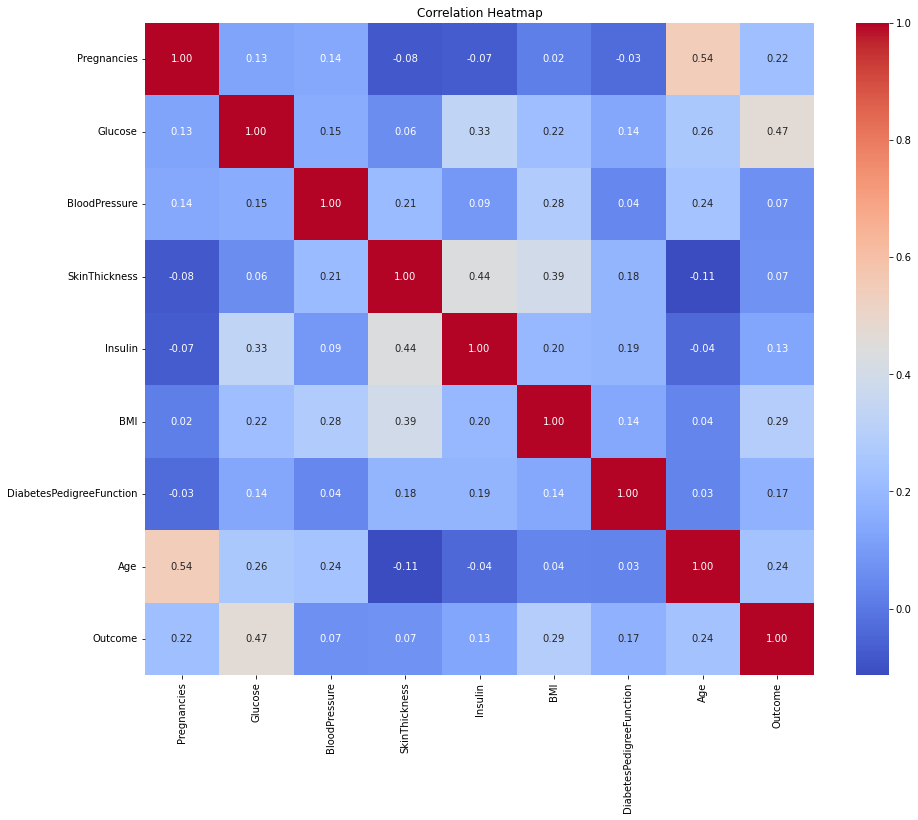

In [74]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [75]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

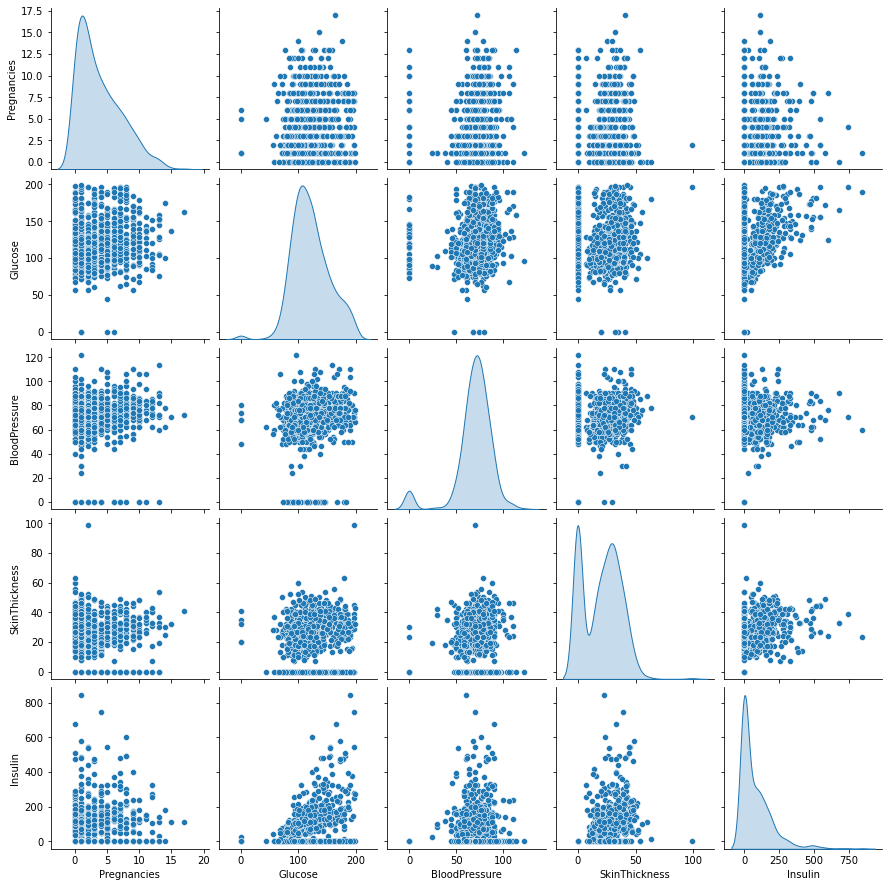

In [76]:
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       ]
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.show()

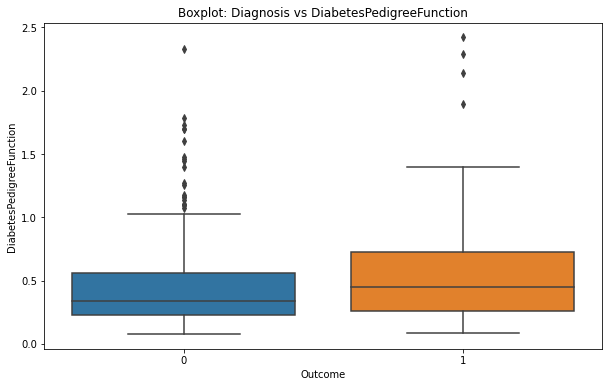

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Boxplot: Diagnosis vs DiabetesPedigreeFunction')
plt.show()

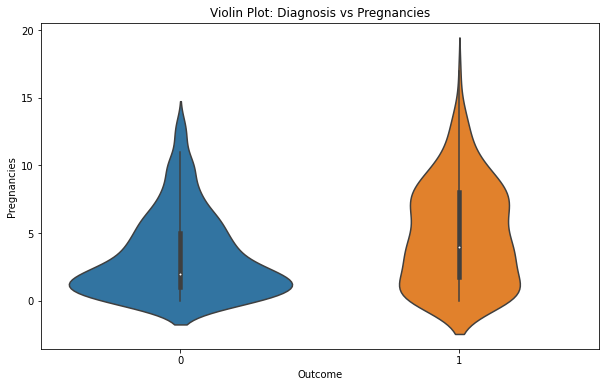

In [78]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Violin Plot: Diagnosis vs Pregnancies')
plt.show()

In [79]:
df_encoded

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_0,Pregnancies_1,...,Pregnancies_7,Pregnancies_8,Pregnancies_9,Pregnancies_10,Pregnancies_11,Pregnancies_12,Pregnancies_13,Pregnancies_14,Pregnancies_15,Pregnancies_17
0,148,72,35,0,33.6,0.627,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,0,26.6,0.351,31,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,0,23.3,0.672,32,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,89,66,23,94,28.1,0.167,21,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,168,43.1,2.288,33,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0,0,0,...,0,0,0,1,0,0,0,0,0,0
764,122,70,27,0,36.8,0.340,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
765,121,72,23,112,26.2,0.245,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
766,126,60,0,0,30.1,0.349,47,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df_encoded = df[['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose', 'SkinThickness', 'DiabetesPedigreeFunction','Outcome']]


In [81]:
y = df_encoded['Outcome']

In [82]:
x= df_encoded.drop(columns=['Outcome'])

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

## Decision Tree Classifier

In [84]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [85]:
dt.score(x_test, y_test)

0.7239583333333334

In [86]:
y_pred_dt = dt.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       121
           1       0.67      0.51      0.58        71

    accuracy                           0.72       192
   macro avg       0.71      0.68      0.69       192
weighted avg       0.72      0.72      0.71       192



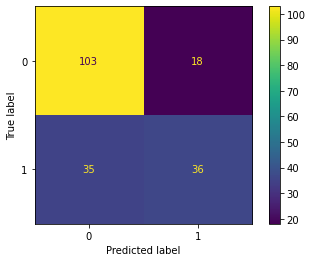

In [87]:
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(conf_mat_dt, display_labels=dt.classes_).plot()

## Logistic Regression

In [88]:
lr = LogisticRegression(random_state=1, max_iter=400)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=400, random_state=1)

In [89]:
lr.score(x_test, y_test)

0.734375

In [90]:
y_pred_lr = lr.predict(x_test)

In [91]:
print(classification_report(y_test, y_pred_lr ))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       121
           1       0.71      0.48      0.57        71

    accuracy                           0.73       192
   macro avg       0.73      0.68      0.69       192
weighted avg       0.73      0.73      0.72       192



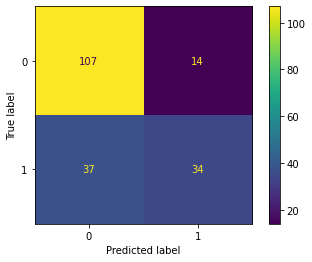

In [92]:
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(conf_mat_lr, display_labels=lr.classes_).plot()

## Naive Bayes¶

In [93]:
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [94]:
y_pred_nb = NB.predict(x_test)
NB.score(x_test, y_test)

0.7135416666666666

In [95]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       121
           1       0.67      0.45      0.54        71

    accuracy                           0.71       192
   macro avg       0.70      0.66      0.67       192
weighted avg       0.71      0.71      0.70       192



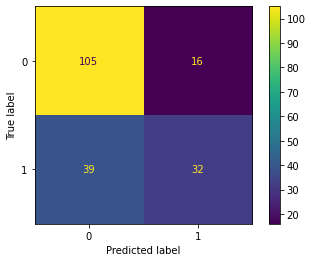

In [96]:
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(conf_mat_nb, display_labels=NB.classes_).plot()

## K-Nearest Neighbors

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [98]:
knn.score(x_test, y_test)

0.6510416666666666

In [99]:
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       121
           1       0.53      0.49      0.51        71

    accuracy                           0.65       192
   macro avg       0.62      0.62      0.62       192
weighted avg       0.65      0.65      0.65       192



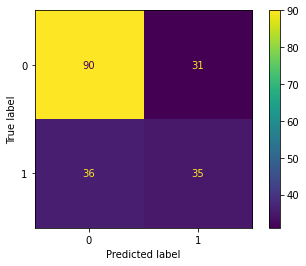

In [100]:
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(conf_mat_knn, display_labels=knn.classes_).plot()

## 5. Random Forest Classifier

In [101]:
error_rate = []
for i in range(1, 100, 10):
    rfc = RandomForestClassifier(n_estimators=i, random_state=42)
    rfc.fit(x_train, y_train)
    error_rate.append(rfc.score(x_test, y_test))

<Axes: >

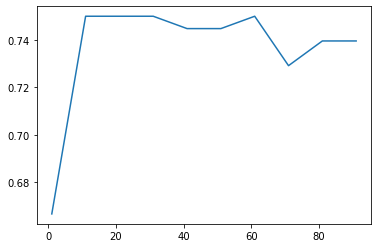

In [102]:
sns.lineplot(x=range(1, 100, 10), y=error_rate)

In [103]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [104]:
rfc.score(x_test, y_test)*100

72.39583333333334

In [105]:
y_pred_rfc = rfc.predict(x_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       121
           1       0.70      0.44      0.54        71

    accuracy                           0.72       192
   macro avg       0.72      0.66      0.67       192
weighted avg       0.72      0.72      0.71       192



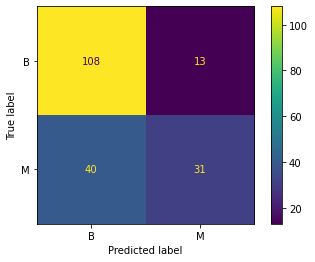

In [106]:
conf_mat_rfc = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(conf_mat_rfc, display_labels=['B', 'M']).plot()

## Support Vector Machine

In [107]:

param_grid = {'C': [0.1, 1, 3, 10, 20],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [108]:
svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [109]:
svc.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.655 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 3, 10, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [110]:
svc.best_params_

{'C': 3, 'gamma': 0.0001, 'kernel': 'rbf'}

In [111]:
y_pred_svc = svc.predict(x_test)
svc.score(x_test, y_test)

0.7083333333333334

In [112]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       121
           1       0.68      0.39      0.50        71

    accuracy                           0.71       192
   macro avg       0.70      0.64      0.65       192
weighted avg       0.70      0.71      0.69       192



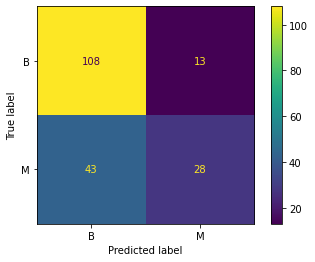

In [113]:
conf_mat_svc = confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(conf_mat_svc, display_labels=['B','M']).plot()

## K means Clustering

In [114]:
df_encoded 

,Age,BMI,Insulin,BloodPressure,Glucose,SkinThickness,DiabetesPedigreeFunction,Outcome
0,50,33.6,0,72,148,35,0.627,1
1,31,26.6,0,66,85,29,0.351,0
2,32,23.3,0,64,183,0,0.672,1
3,21,28.1,94,66,89,23,0.167,0
4,33,43.1,168,40,137,35,2.288,1
...,...,...,...,...,...,...,...,...
763,63,32.9,180,76,101,48,0.171,0
764,27,36.8,0,70,122,27,0.340,0
765,30,26.2,112,72,121,23,0.245,0
766,47,30.1,0,60,126,0,0.349,1


In [115]:
df_encoded.columns

Index(['Age', 'BMI', 'Insulin', 'BloodPressure', 'Glucose', 'SkinThickness',
       'DiabetesPedigreeFunction', 'Outcome'],
      dtype='object')

In [116]:
x = df_encoded[['BloodPressure', 'Glucose']].to_numpy()
wcse = []
x

array([[ 72, 148],
       [ 66,  85],
       [ 64, 183],
       ...,
       [ 72, 121],
       [ 60, 126],
       [ 70,  93]], dtype=int64)

In [117]:
import numpy as np
from sklearn.cluster import KMeans

In [118]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10, n_init='auto')
    kmeans.fit(x)
    wcse.append(kmeans.inertia_)

C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

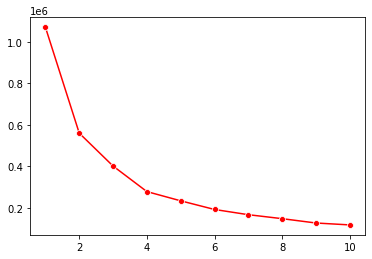

In [119]:
sns.lineplot(x=range(1, 11), y=wcse, marker='o', color='red')

In [120]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [121]:
kmeans.fit(df[['BloodPressure', 'Glucose','SkinThickness']])

C:\Users\soham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

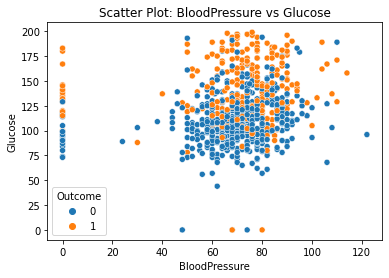

In [122]:
sns.scatterplot(x='BloodPressure', y='Glucose', hue='Outcome', data=df)
plt.title('Scatter Plot: BloodPressure vs Glucose')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.show()